# Gradient descent and backpropagation

Gradient descent and backpropagation are both essential concepts in the training of neural networks, and they are closely related, but they serve slighty different purposes in the learning process.

## Gradient descent

We have previously gotten familiar with the concept of a loss function. It can help us quantify how far off our predictions are from the actual values. The next step would be to know what changes to make to our weights and biases in order to minimize the loss function. That is where gradient descent comes into play.
Gradient descent works by iteratively adjusting the model's parameters (weights and biases) in the direction that decreases the loss function.


Let's first simplify the problem to 1 dimension in order to make it more approachable :

Minimizing the loss function means finding a local minima. *What value of $x$ gives me the lowest $y$ ?*

![alt text](local_minima_dots_4_10.png)

Those of you familiar with calculus know we can determine the slope of the function at any given point by finding the derivative. The derivative tells us how steep the function is and in which direction it is sloping—whether it's increasing or decreasing. If the slope (or derivative) is positive, it means that the function is increasing at that point, so to minimize the loss, we would need to move in the negative direction. Conversely, if the slope is negative, the function is decreasing, and we would move in the positive direction to reach the minimum. Think of it as a ball rolling down a hill.

![alt text](youtube-video-gif.gif)

In the context of a neural network we are dealing with loss functions that have a lot more than one parameter.

The gradient is a generalization of the derivative to multiple dimensions. When dealing with functions of multiple variables, like a function $f(x_1, x_2, \dots, x_n)$, the gradient is a vector that contains all the partial derivatives of the function with respect to each of its variables.

For example, if we have a function $f(x, y)$, the gradient of $f$, denoted as $\nabla f$, is a vector that consists of two components:


$\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$


Each component tells us the rate of change of the function with respect to one of the variables while keeping the others constant.

For each interation we will update our parameters by moving them in the opposite direction of the gradient, scaled by a factor known as the **learning rate**. The general formula for gradient descent is:

$\theta_{t+1} = \theta_t - \alpha \nabla_{\theta} L(\theta_t)$

Where:

- $\theta_t$ represents the parameter vector at iteration $t$.
- $\alpha$ is the **learning rate**, an arbitrary positive scalar that determines the size of the steps we take in the direction of the negative gradient.
- $\nabla_{\theta} L(\theta_t)$ is the gradient of the loss function $L(\theta)$ with respect to the parameters $\theta$ at iteration $t$. This gradient is a vector where each component is the partial derivative of the loss function with respect to a specific parameter in $\theta$.

![alt text](<gradient descent.png>)

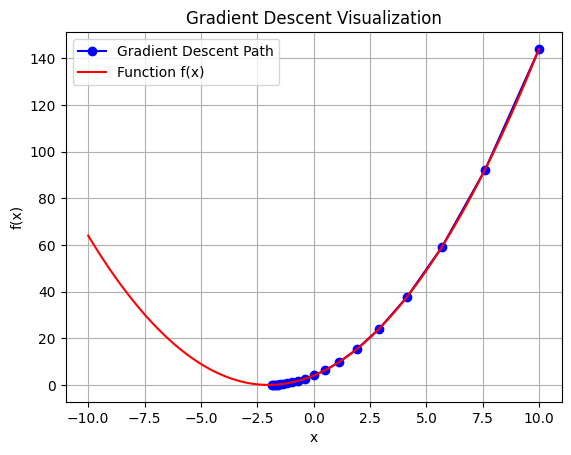

In [7]:
"""Let's try to implement our iterative gradient descent with a simple 1D function"""

import numpy as np
import matplotlib.pyplot as plt

# Define the function to minimize
def function(x):
    # TODO: Implement the function f(x) = x^2 + 4*x + 4
    return 


# Define the gradient of the function
def gradient(x):
    # TODO: Implement the gradient of the above function
    return 

# Parameters
learning_rate = 0.1
iterations = 20
start_point = 10  # Starting point for gradient descent

# Lists to store the values of x and f(x) for each iteration
x_values = []
f_values = []

# Gradient Descent Algorithm
x = start_point
for i in range(iterations):
    x_values.append(x)
    # TODO: Append the function value at the current x to f_values
    # TODO: Update x using the gradient descent update rule

# Visualization
plt.plot(x_values, f_values, 'bo-', label='Gradient Descent Path')
x_range = np.linspace(-10, 10, 400)
plt.plot(x_range, function(x_range), 'r-', label='Function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Visualization')
plt.legend()
plt.grid(True)
plt.show()


## Backpropagation

While the concept of gradient tells us the direction in which we should adjust each parameter (whether to increase or decrease it), so far we only know how to calculate the gradient for the output layer.

Backpropagation is the algorithm in charge of communicating the gradient from the output layer all the way back to the input layer and it does so using some calculus magic called the **chained rule** (you actually might have seen it in high-school).

_"If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man."_

The relationship between this example and the chain rule is as follows. Let $z$, $y$, and $x$ be the (variable) positions of the car, the bicycle, and the walking man, respectively. The rate of change of relative positions of the car and the bicycle is $\frac{dz}{dy} = 2.$

Similarly, $\frac{dy}{dx} = 4.$

So, the rate of change of the relative positions of the car and the walking man is

$
\frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx} = 2 \cdot 4 = 8.
$

Our neural network basically looks like $f(g(h(i(j(x)))))$ with $x$ as the input and $f$ as the output layer. By calculating the gradient of $f$ we are asking _"how does a change in $g(h(i(j(x))))$ affect the output of $f$"_. We want to be able to reproduce that same step with $g$ and $h(i(j(x)))$, etc.

We can use the relation seen above to assert that given a composite function $f(g(h(i(j(x)))))$, the gradient $\frac{\partial f(g(h(i(j(x))))) }{\partial x}$ can be computed as:

$
\frac{\partial f(g(h(i(j(x))))) }{\partial x} = \frac{\partial f}{\partial x} = \frac{\partial f}{\partial g} \times \frac{\partial g}{\partial h} \times \frac{\partial h}{\partial i} \times \frac{\partial i}{\partial j} \times \frac{\partial j}{\partial x}$


This is the basis on which backpropagation is built.

If you want to go further, here is a list of useful videos/websites to understand the topic more thoroughly:
- https://www.youtube.com/watch?v=SmZmBKc7Lrs&t=282s
- https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=eCb-husS-sTwthq-
- https://ai.plainenglish.io/calculus-for-backpropagation-doesnt-have-to-be-scary-16595d76e744
- https://en.wikipedia.org/wiki/Chain_rule